In [12]:
!pip install numpy==1.21.0


In [13]:
import numpy 
print(numpy.__version__)

1.23.5


In [15]:
!pip install shap

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
df=pd.read_csv('apartment_cost_list.csv')
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [101]:
df.columns

Index(['Job #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot', 'Bin #',
       'Job Type', 'Community - Board', 'Curb Cut', 'Fully Permitted',
       'Initial Cost', 'Proposed Zoning Sqft', 'Horizontal Enlrgmt',
       'Vertical Enlrgmt', 'Enlargement SQ Footage', 'Zoning Dist1',
       'Job Description'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job #                   19613 non-null  int64 
 1   Borough                 19613 non-null  object
 2   House #                 19613 non-null  object
 3   Street Name             19613 non-null  object
 4   Block                   19613 non-null  int64 
 5   Lot                     19613 non-null  int64 
 6   Bin #                   19613 non-null  int64 
 7   Job Type                19613 non-null  object
 8   Community - Board       19613 non-null  int64 
 9   Curb Cut                16 non-null     object
 10  Fully Permitted         15625 non-null  object
 11  Initial Cost            19613 non-null  object
 12  Proposed Zoning Sqft    19613 non-null  int64 
 13  Horizontal Enlrgmt      163 non-null    object
 14  Vertical Enlrgmt        242 non-null    object
 15  En

In [103]:
df.shape

(19613, 18)

In [104]:
df.describe()

,Job #,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage
count,1.961300e+04,19613.000000,19613.000000,1.961300e+04,19613.000000,19613.000000,19613.000000
mean,1.624266e+08,1551.725794,1261.811197,1.506365e+06,151.269005,719.625809,18.639219
std,9.157722e+07,1550.780753,2764.626109,9.319992e+05,90.115653,10859.926278,303.278381
min,1.021331e+08,0.000000,0.000000,1.000043e+06,101.000000,0.000000,0.000000
25%,1.048244e+08,816.000000,17.000000,1.028758e+06,105.000000,0.000000,0.000000
50%,1.217112e+08,1245.000000,36.000000,1.046983e+06,107.000000,0.000000,0.000000
75%,1.408258e+08,1576.000000,66.000000,1.084564e+06,111.000000,0.000000,0.000000
max,5.401803e+08,16278.000000,9007.000000,5.860016e+06,503.000000,724475.000000,29687.000000


In [105]:
df.isnull().sum()

Job #                         0
Borough                       0
House #                       0
Street Name                   0
Block                         0
Lot                           0
Bin #                         0
Job Type                      0
Community - Board             0
Curb Cut                  19597
Fully Permitted            3988
Initial Cost                  0
Proposed Zoning Sqft          0
Horizontal Enlrgmt        19450
Vertical Enlrgmt          19371
Enlargement SQ Footage        0
Zoning Dist1               2096
Job Description               0
dtype: int64

<AxesSubplot: >

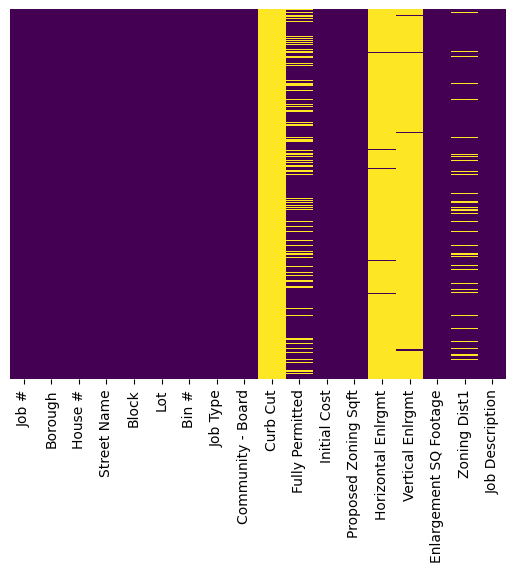

In [106]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
missing=df.isnull().sum()*100/df.shape[0]
missing[missing>0].sort_values(ascending=False)

Curb Cut              99.918421
Horizontal Enlrgmt    99.168919
Vertical Enlrgmt      98.766125
Fully Permitted       20.333452
Zoning Dist1          10.686789
dtype: float64

In [108]:
df.drop(columns=['Job #','House #','Curb Cut','Horizontal Enlrgmt','Vertical Enlrgmt'],inplace=True)
df.shape

(19613, 13)

In [110]:
df.dtypes

Borough                   object
Street Name               object
Block                      int64
Lot                        int64
Bin #                      int64
Job Type                  object
Community - Board          int64
Fully Permitted           object
Initial Cost              object
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Zoning Dist1              object
Job Description           object
dtype: object

In [111]:
df['Year']=df['Fully Permitted'].str[-4:]

In [112]:
df.head()

,Borough,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description,Year
0,MANHATTAN,2ND AVENUE,1545,49,1049907,A2,108,NaN,$65000.00,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,NaN
1,MANHATTAN,E 89 ST,1517,43,1048094,A2,108,07/14/2020,$85000.00,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,2020
2,BROOKLYN,GATES AVENUE,1962,86,3056039,A1,302,05/23/2007,$60000.00,0,0,R6,Change existing four story and basement brick ...,2007
3,BROOKLYN,OCEAN AVENUE,7584,35,3206621,A2,314,02/28/2006,$75000.00,0,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...,2006
4,BROOKLYN,NOBLE STREET,2573,10,3065099,A1,301,09/29/2006,$40000.00,0,0,C4-3,New C of O for existing building. New duplex a...,2006


In [113]:
df.drop(columns=['Fully Permitted'],inplace=True)
df.shape

(19613, 13)

In [114]:
df['Initial Cost']=df['Initial Cost'].str.replace('$','').str.slice(stop=-3)

C:\Users\gopiv\AppData\Local\Temp\ipykernel_10948\399295128.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Initial Cost']=df['Initial Cost'].str.replace('$','').str.slice(stop=-3)


In [115]:
df.head()

,Borough,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description,Year
0,MANHATTAN,2ND AVENUE,1545,49,1049907,A2,108,65000,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,NaN
1,MANHATTAN,E 89 ST,1517,43,1048094,A2,108,85000,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,2020
2,BROOKLYN,GATES AVENUE,1962,86,3056039,A1,302,60000,0,0,R6,Change existing four story and basement brick ...,2007
3,BROOKLYN,OCEAN AVENUE,7584,35,3206621,A2,314,75000,0,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...,2006
4,BROOKLYN,NOBLE STREET,2573,10,3065099,A1,301,40000,0,0,C4-3,New C of O for existing building. New duplex a...,2006


In [116]:
df['Initial Cost']=df['Initial Cost'].astype(int)
df.dtypes

Borough                   object
Street Name               object
Block                      int64
Lot                        int64
Bin #                      int64
Job Type                  object
Community - Board          int64
Initial Cost               int32
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Zoning Dist1              object
Job Description           object
Year                      object
dtype: object

In [117]:
x=df['Job Type'].value_counts().index
x

Index(['A2', 'A1', 'A3'], dtype='object')

<AxesSubplot: xlabel='Job Type', ylabel='count'>

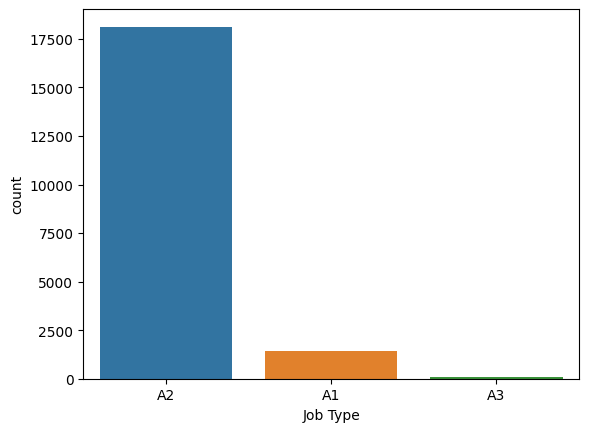

In [118]:
sns.countplot(data=df,x=df['Job Type'])

In [119]:
df.isnull().sum()

Borough                      0
Street Name                  0
Block                        0
Lot                          0
Bin #                        0
Job Type                     0
Community - Board            0
Initial Cost                 0
Proposed Zoning Sqft         0
Enlargement SQ Footage       0
Zoning Dist1              2096
Job Description              0
Year                      3988
dtype: int64

In [120]:
from sklearn.ensemble import RandomForestRegressor
import math
train_data = df.dropna()
test_data = df[df['Year'].isnull()]
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(train_data.index.values.reshape(-1, 1), train_data['Year'])
predictions = regressor.predict(test_data.index.values.reshape(-1, 1))
predictions = [math.floor(p) for p in predictions]
df.loc[df['Year'].isnull(), 'Year'] = predictions
df.head()

,Borough,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Zoning Dist1,Job Description,Year
0,MANHATTAN,2ND AVENUE,1545,49,1049907,A2,108,65000,0,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,2015
1,MANHATTAN,E 89 ST,1517,43,1048094,A2,108,85000,0,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,2020
2,BROOKLYN,GATES AVENUE,1962,86,3056039,A1,302,60000,0,0,R6,Change existing four story and basement brick ...,2007
3,BROOKLYN,OCEAN AVENUE,7584,35,3206621,A2,314,75000,0,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...,2006
4,BROOKLYN,NOBLE STREET,2573,10,3065099,A1,301,40000,0,0,C4-3,New C of O for existing building. New duplex a...,2006


In [121]:
train_data.index.values.reshape(-1, 1)
train_data['Year']

1        2020
2        2007
4        2006
5        2005
6        2006
         ... 
19606    2019
19607    2022
19608    2017
19609    2012
19610    2001
Name: Year, Length: 14823, dtype: object

In [122]:
test_data.index.values.reshape(-1, 1)

array([[    0],
       [   13],
       [   17],
       ...,
       [19584],
       [19611],
       [19612]], dtype=int64)

In [123]:
df['Year']=df['Year'].astype(int)
df.dtypes

Borough                   object
Street Name               object
Block                      int64
Lot                        int64
Bin #                      int64
Job Type                  object
Community - Board          int64
Initial Cost               int32
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Zoning Dist1              object
Job Description           object
Year                       int32
dtype: object

In [124]:
df.drop(columns=['Street Name', 'Block', 'Bin #', 'Job Description', 'Zoning Dist1'], inplace=True)

In [125]:
df.duplicated().sum()

6684

In [126]:
df=df.drop_duplicates()
df.shape

(12929, 8)

In [127]:
df.select_dtypes(include='object').nunique()

Borough     5
Job Type    3
dtype: int64

In [128]:
df.columns

Index(['Borough', 'Lot', 'Job Type', 'Community - Board', 'Initial Cost',
       'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Year'],
      dtype='object')

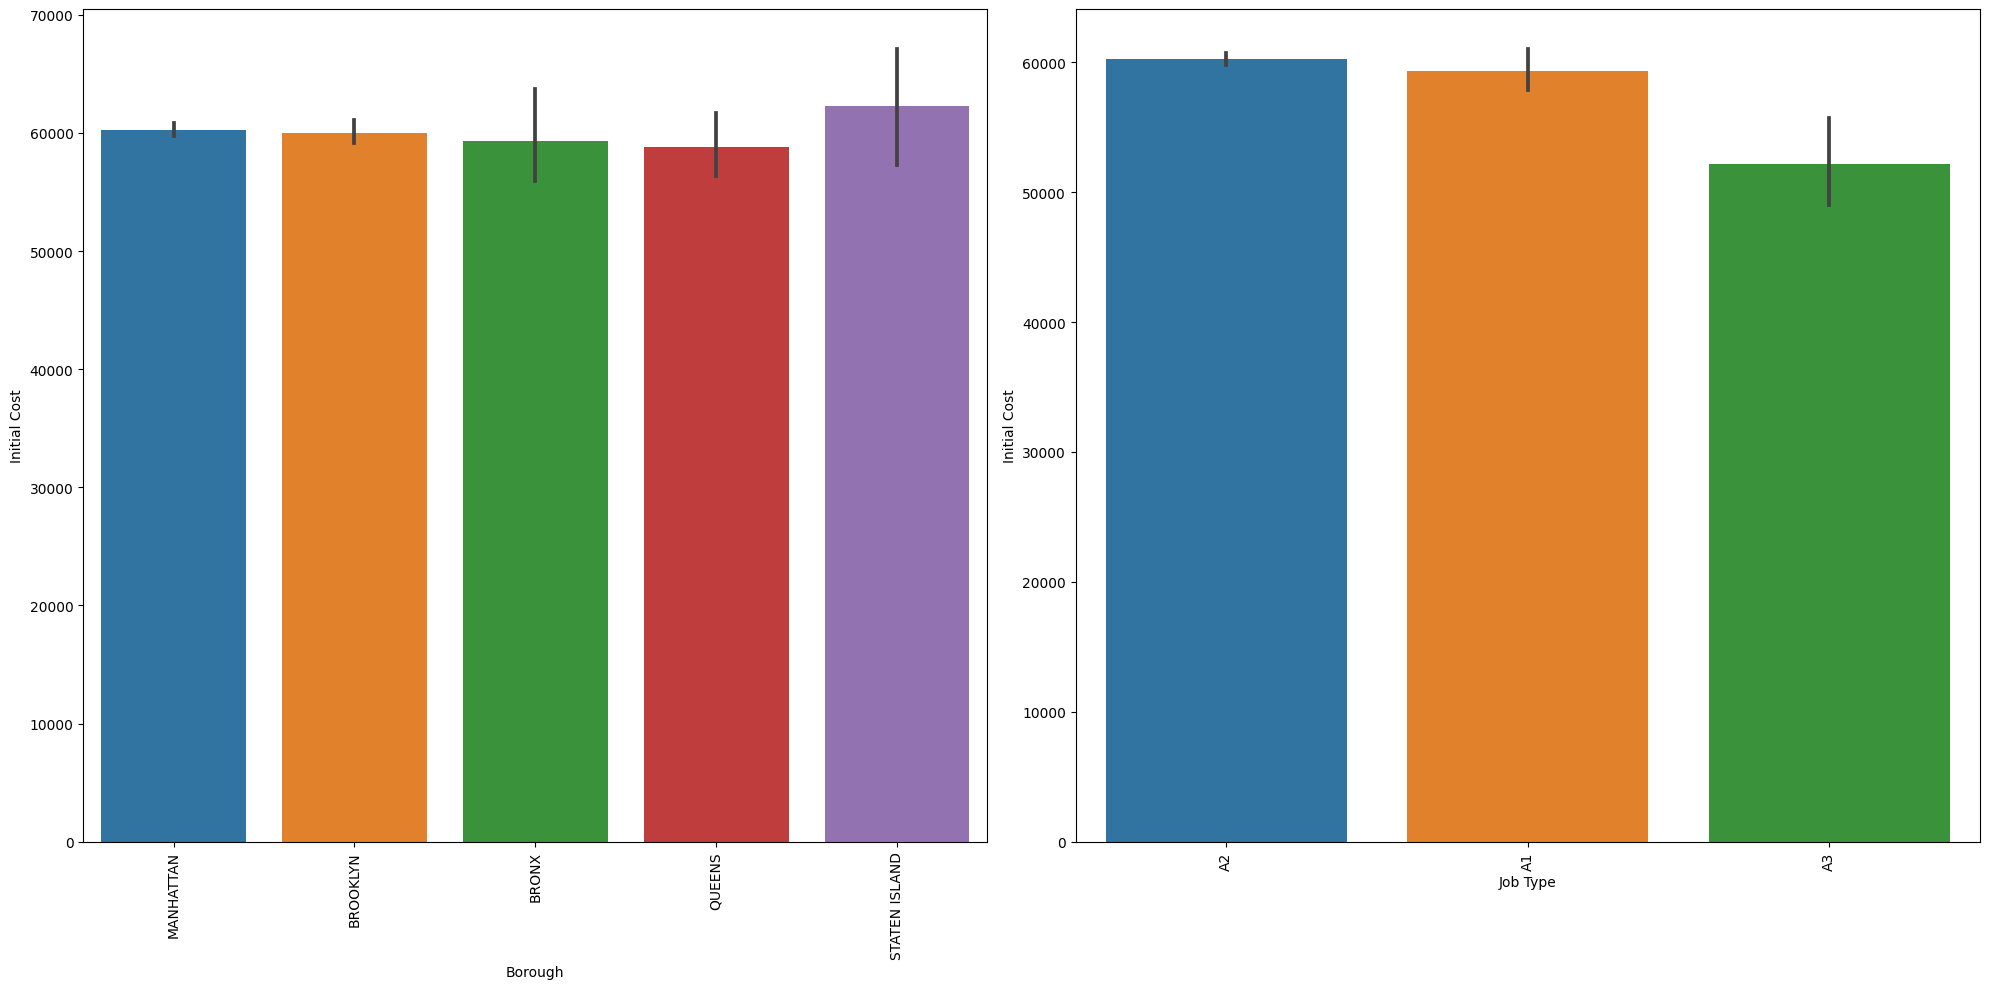

In [129]:
cat_vars = ['Borough', 'Job Type']

# create figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(cat_vars):
    sns.barplot(x=var, y='Initial Cost', data=df, ax=axs[i], estimator=np.mean)
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

In [130]:
df.select_dtypes(include='int').nunique()

Lot                       265
Community - Board          59
Initial Cost               46
Proposed Zoning Sqft      331
Enlargement SQ Footage    229
Year                       23
dtype: int64

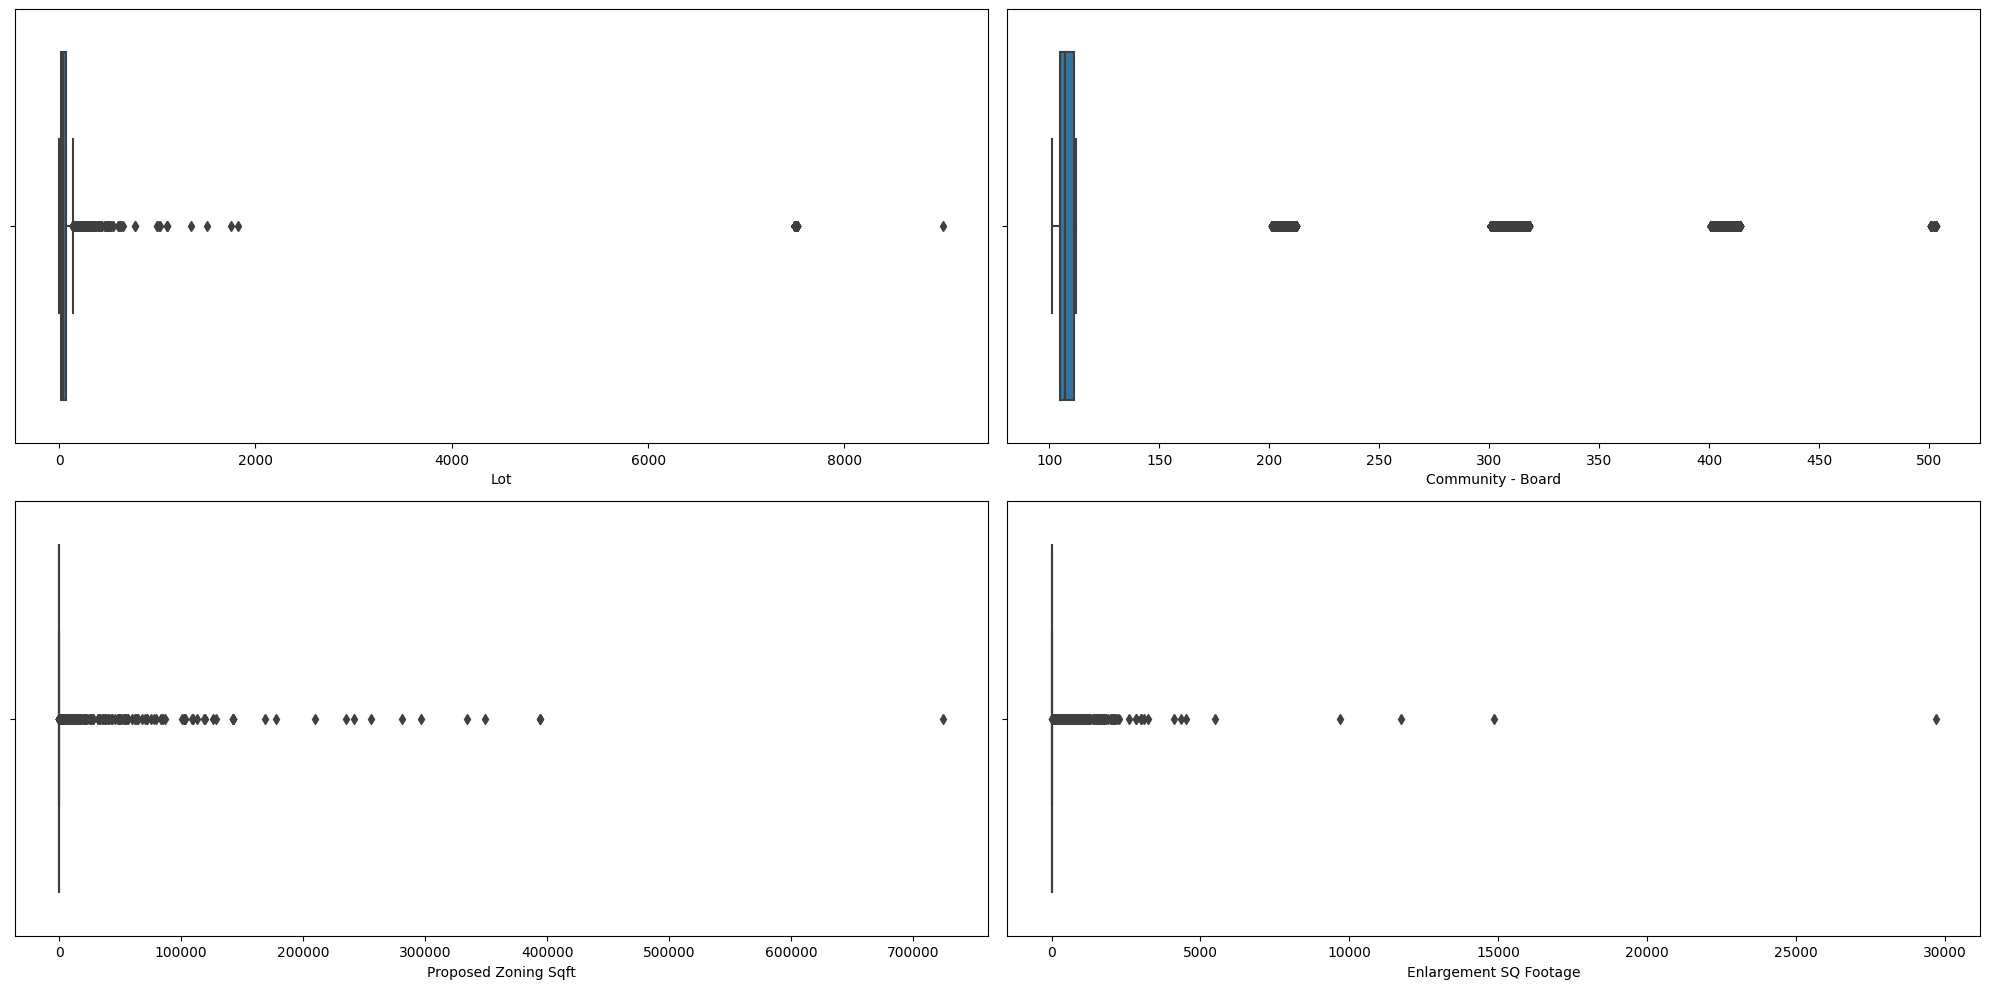

In [131]:
num_vars = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

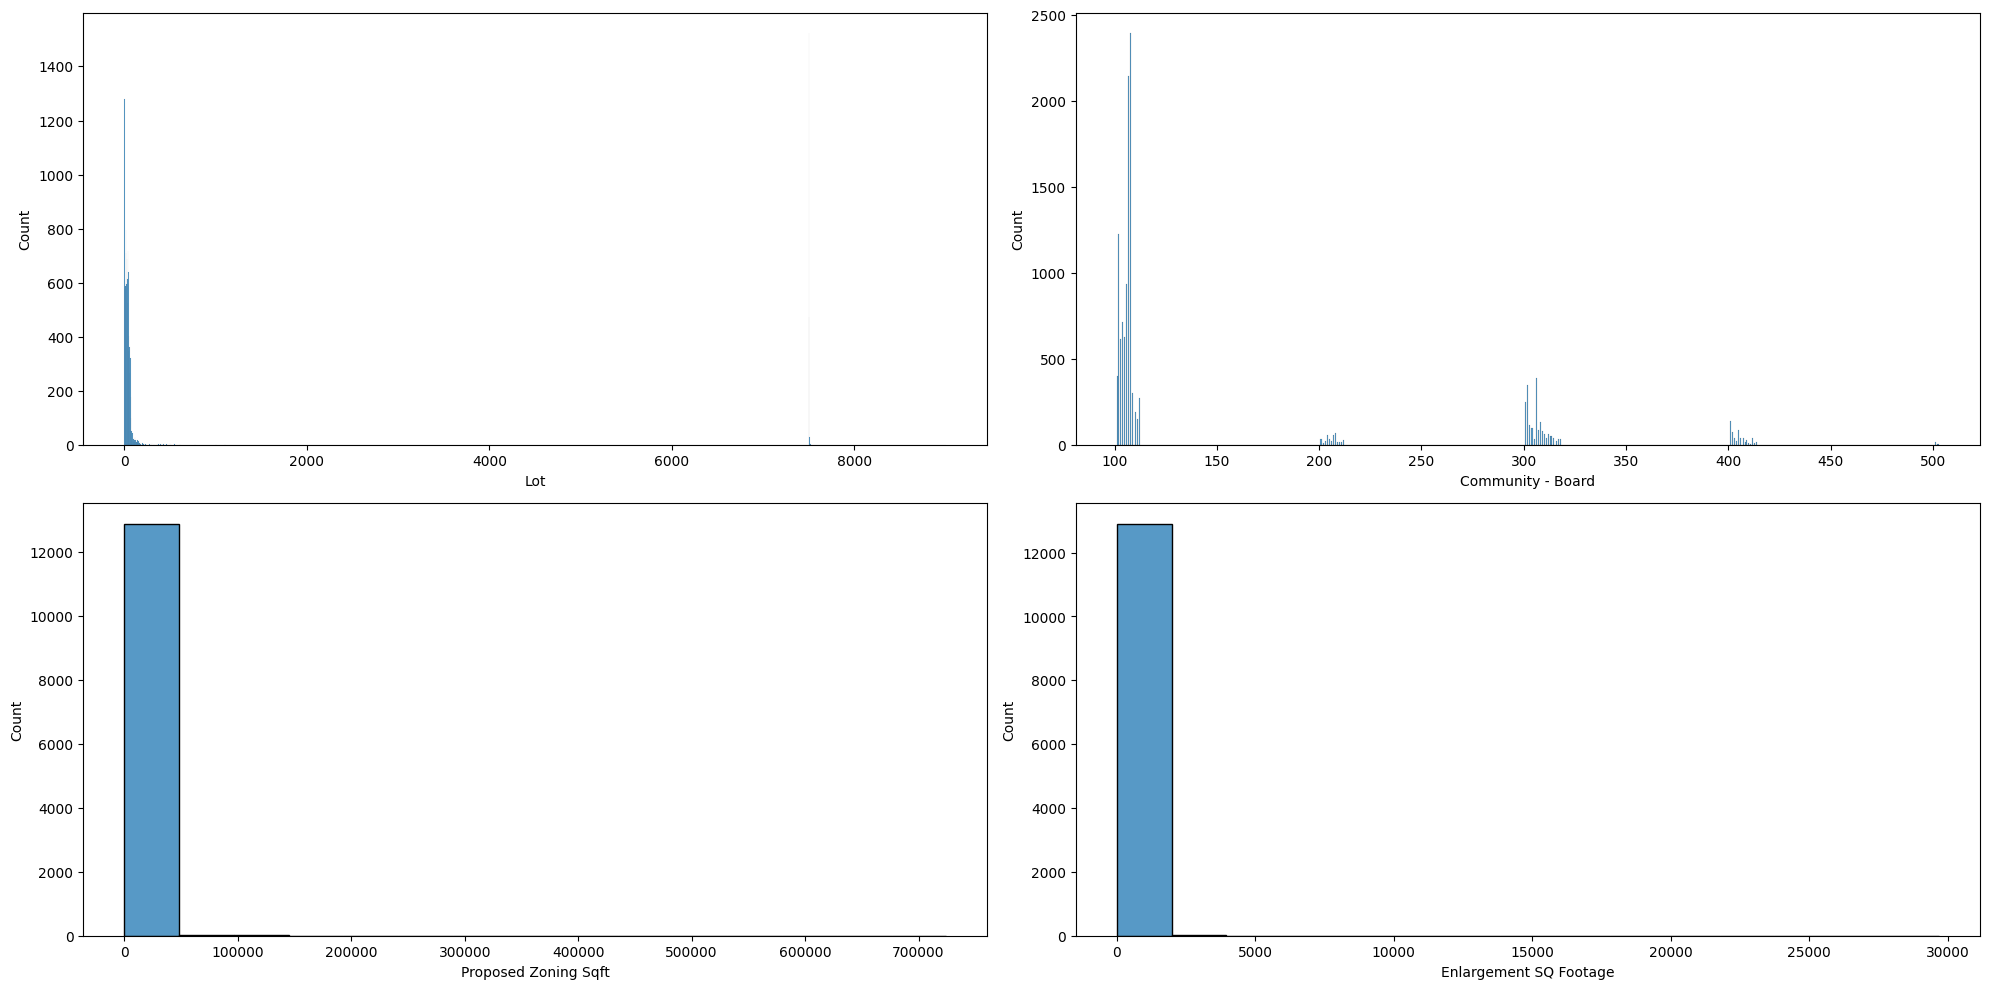

In [132]:
num_vars = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.histplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

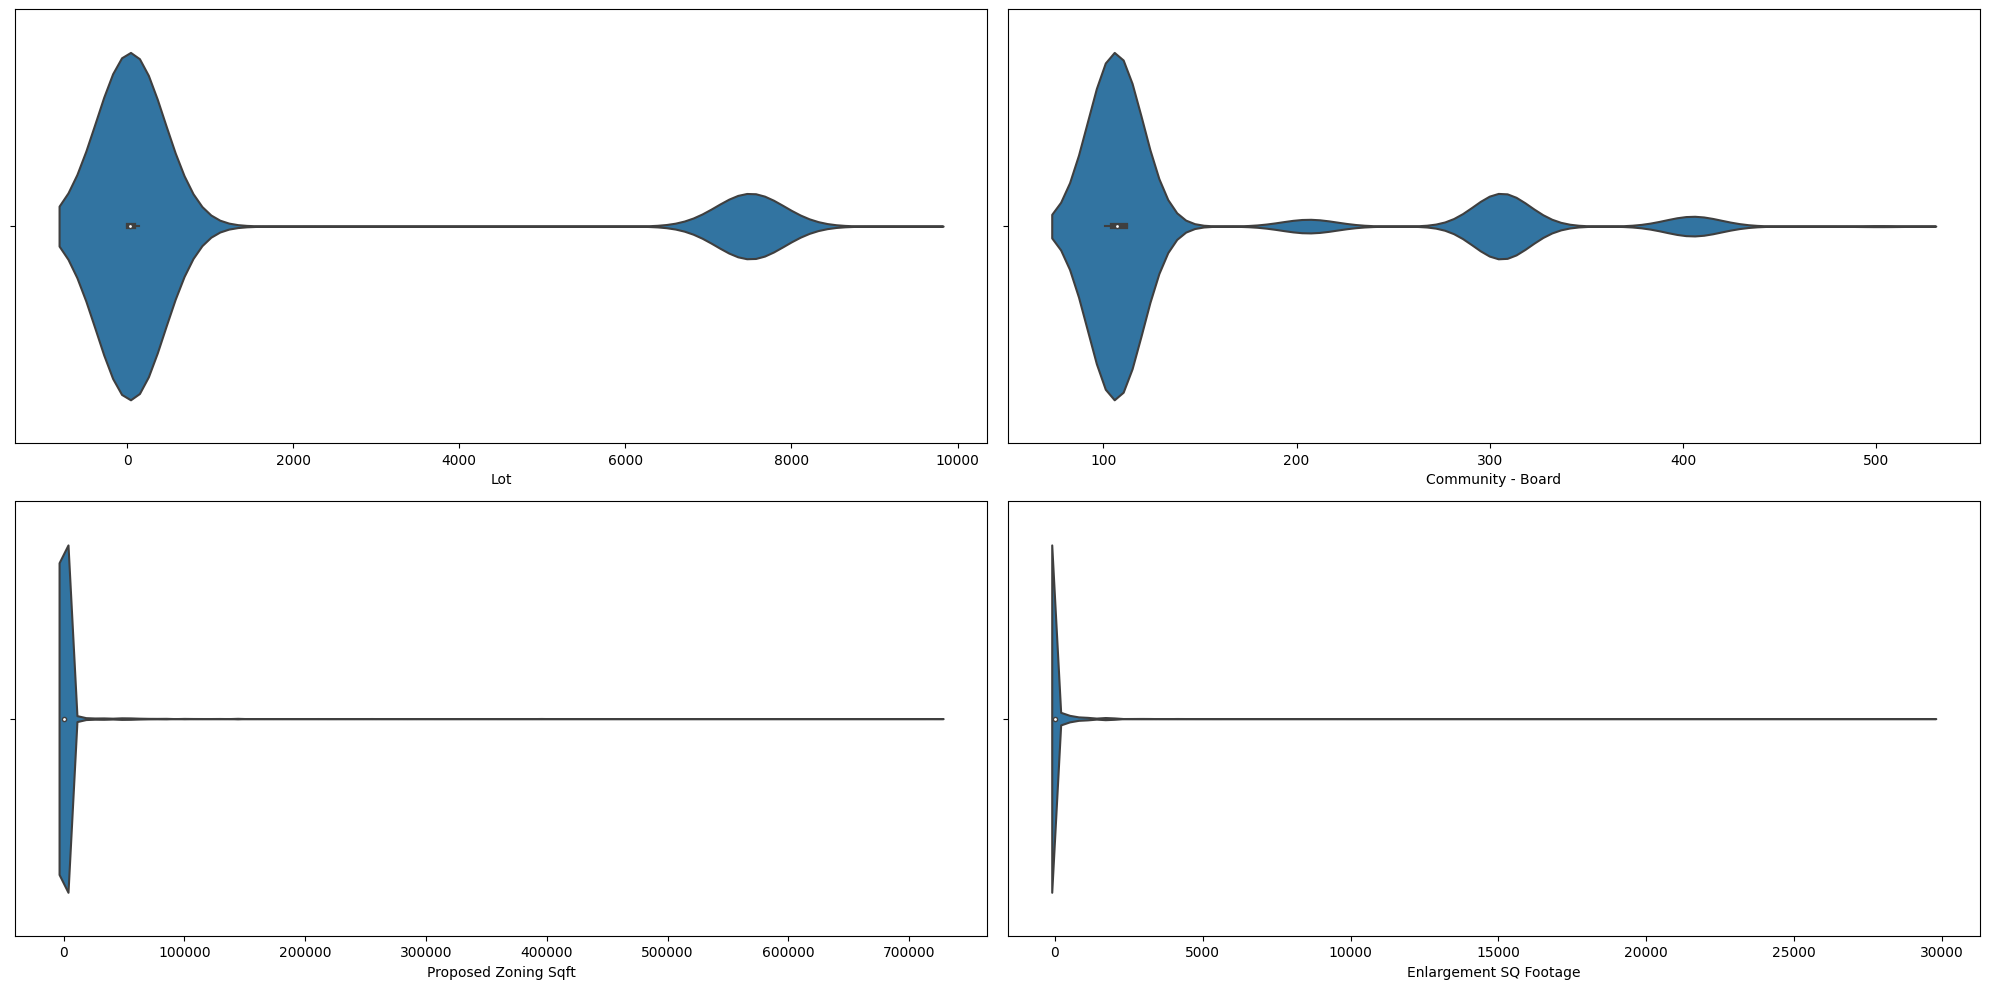

In [133]:
num_vars = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [134]:
from platform import python_version

print(python_version())

3.9.13


In [135]:
import numpy
print(numpy.__version__)

1.23.5


In [136]:
import pandas
print(pandas.__version__)

1.5.3


In [137]:
import matplotlib
print(matplotlib.__version__)

3.6.0


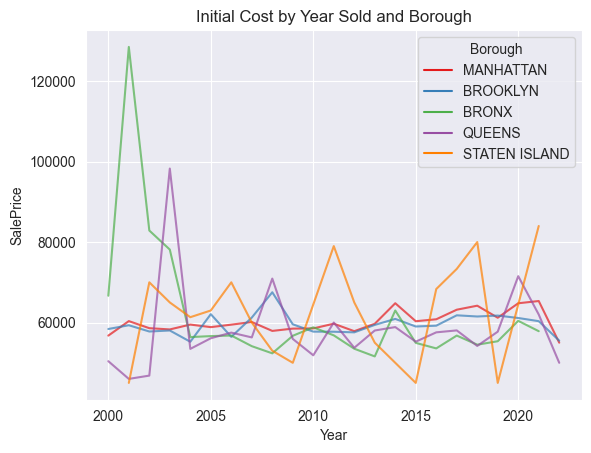

In [138]:
sns.set_style("darkgrid")
with pd.option_context('mode.use_inf_as_null', False):
    sns.lineplot(x='Year', y='Initial Cost', hue='Borough', data=df, palette='Set1', ci=None, estimator='mean', alpha=0.7)

plt.title("Initial Cost by Year Sold and Borough")
plt.xlabel("Year")
plt.ylabel("SalePrice")
plt.show()

In [139]:
df.head()

,Borough,Lot,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Year
0,MANHATTAN,49,A2,108,65000,0,0,2015
1,MANHATTAN,43,A2,108,85000,0,0,2020
2,BROOKLYN,86,A1,302,60000,0,0,2007
3,BROOKLYN,35,A2,314,75000,0,0,2006
4,BROOKLYN,10,A1,301,40000,0,0,2006


In [140]:
df.dtypes

Borough                   object
Lot                        int64
Job Type                  object
Community - Board          int64
Initial Cost               int32
Proposed Zoning Sqft       int64
Enlargement SQ Footage     int64
Year                       int32
dtype: object

In [141]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Borough: ['MANHATTAN' 'BROOKLYN' 'BRONX' 'QUEENS' 'STATEN ISLAND']
Job Type: ['A2' 'A1' 'A3']


In [142]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Borough: [2 1 0 3 4]
Job Type: [1 0 2]


In [143]:
# define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# specify the columns to remove outliers from
columns_to_check = ['Lot', 'Community - Board', 'Proposed Zoning Sqft', 'Enlargement SQ Footage']

# call the function to remove outliers using IQR
df_clean = remove_outliers_iqr(df, columns_to_check)

# print the resulting dataframe
df_clean.head()

,Borough,Lot,Job Type,Community - Board,Initial Cost,Proposed Zoning Sqft,Enlargement SQ Footage,Year
0,2,49,1,108,65000,0,0,2015
1,2,43,1,108,85000,0,0,2020
2,1,86,0,302,60000,0,0,2007
3,1,35,1,314,75000,0,0,2006
4,1,10,0,301,40000,0,0,2006


In [144]:
df_clean.shape

(9605, 8)

<AxesSubplot: >

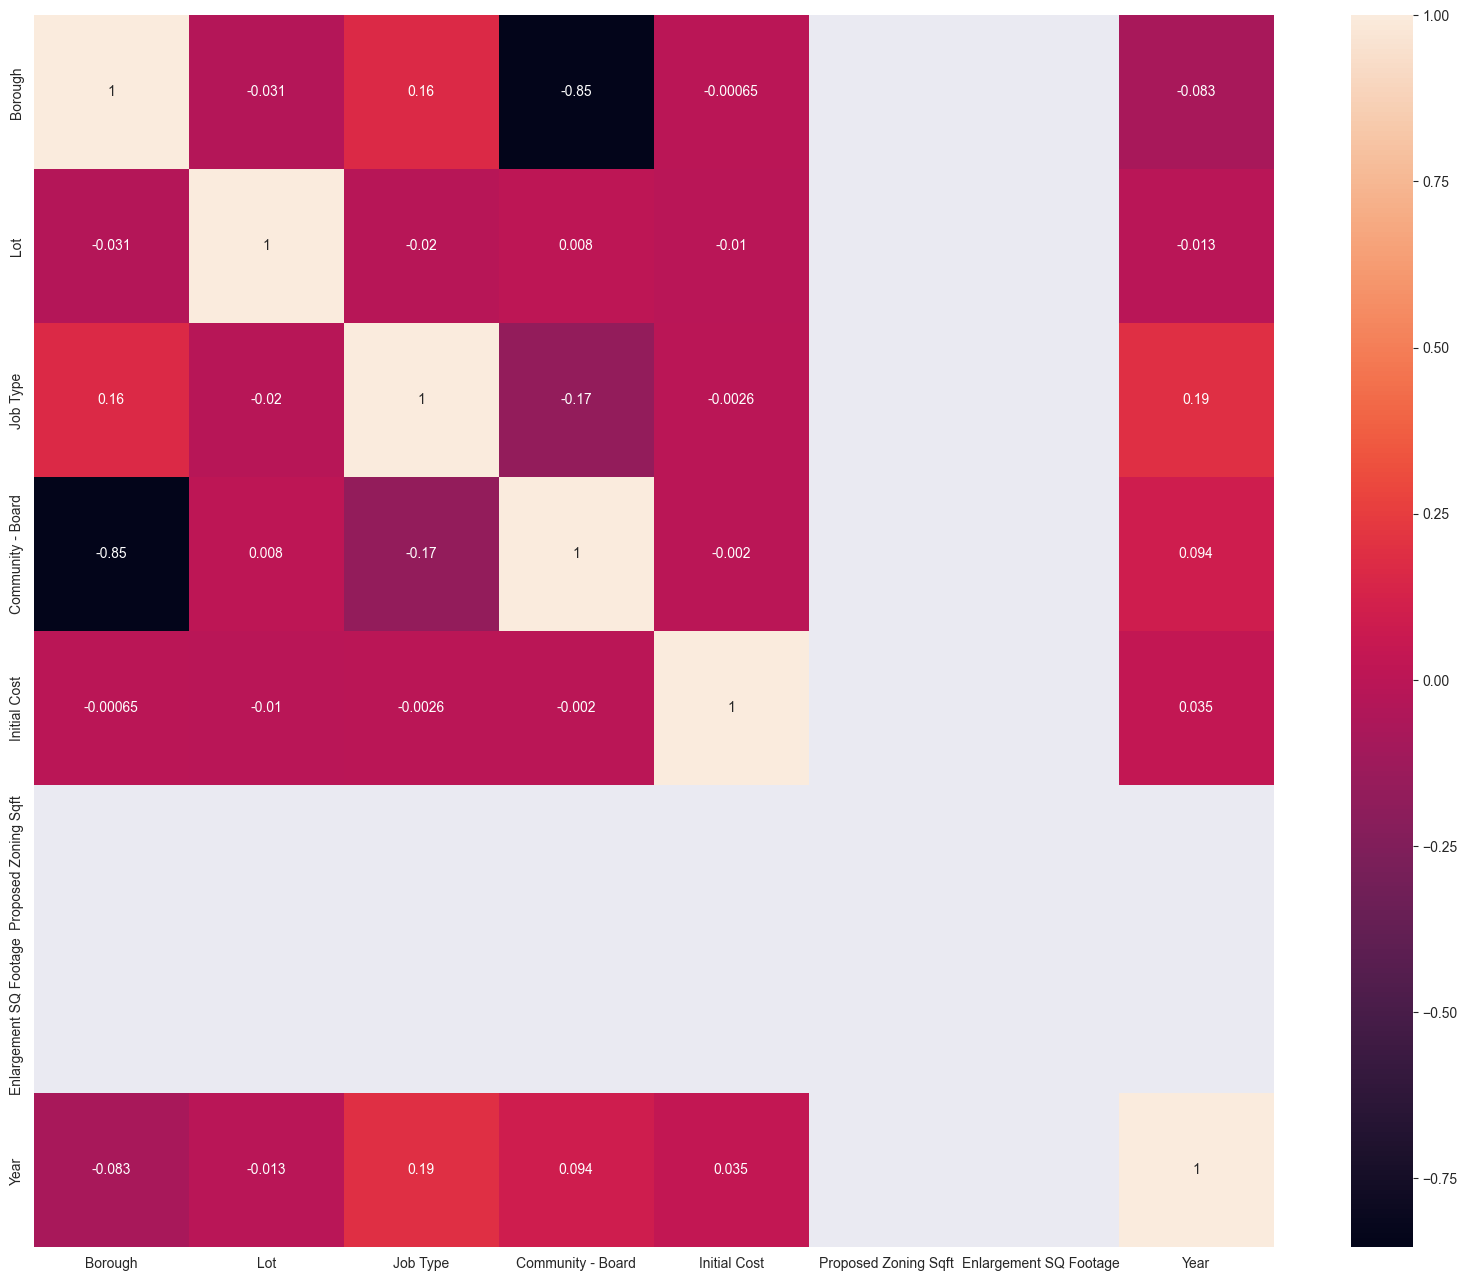

In [145]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df_clean.corr(method='pearson'), fmt='.2g', annot=True)

In [146]:
df_clean.drop(columns=['Proposed Zoning Sqft', 'Enlargement SQ Footage'], inplace=True)

In [147]:
X = df_clean.drop('Initial Cost', axis=1)
y = df_clean['Initial Cost']

In [148]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [149]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston


# Create a DecisionTreeRegressor object
dtree = DecisionTreeRegressor()

# Define the hyperparameters to tune and their values
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}


In [150]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=2, max_features='sqrt', min_samples_leaf=3, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, max_features='sqrt', min_samples_leaf=3,
                      random_state=0)

In [152]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error,accuracy_score
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 12326.045367413335
MAPE is 0.2194045066760006
MSE is 456702110.6384338
R2 score is -0.0061862178832226
RMSE score is 21370.58985237501


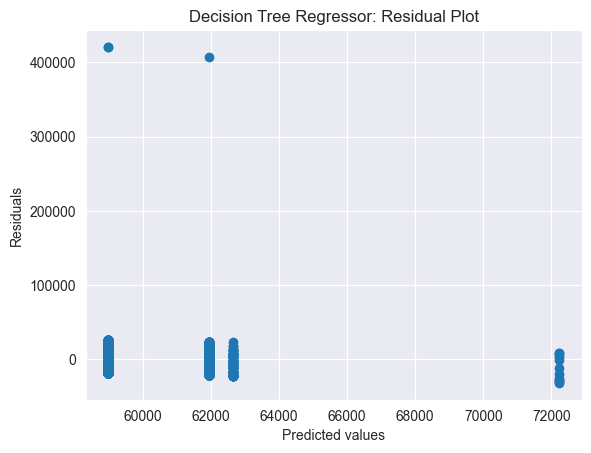

In [153]:
residuals = y_test - y_pred

# Create a scatter plot of predicted values vs residuals
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Decision Tree Regressor: Residual Plot")
plt.show()

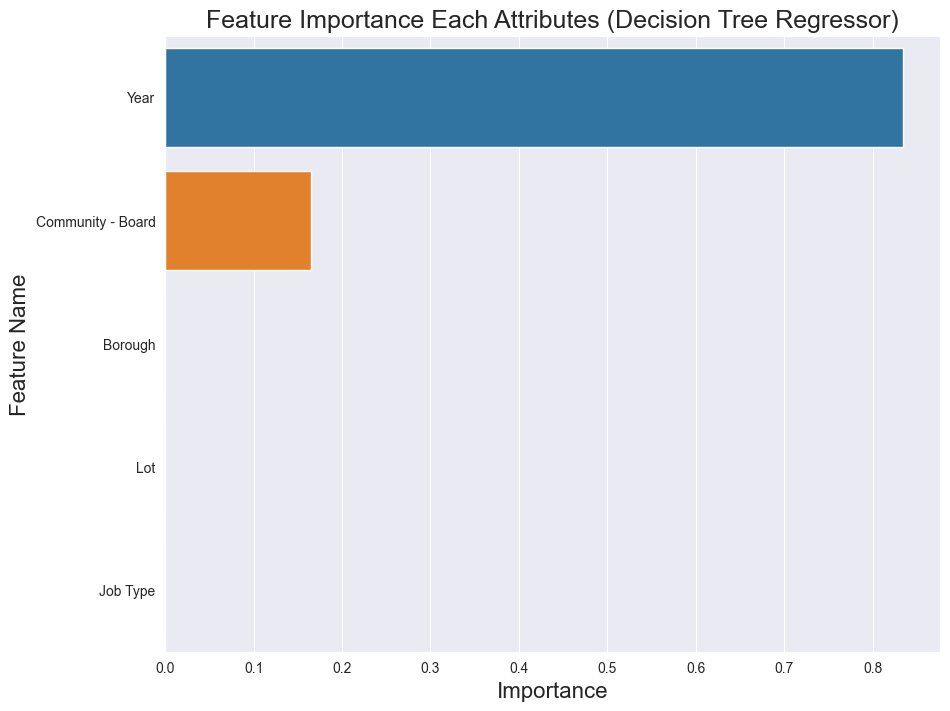

In [154]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()